In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
nifty_50_df = pd.read_csv("/content/drive/MyDrive/NIFTY 50.csv", index_col='Date', parse_dates=['Date'])
nifty_bank_df = pd.read_csv("/content/drive/MyDrive/NIFTY BANK.csv", index_col='Date', parse_dates=['Date'])

nifty_50_df.head(5)

,Open,High,Low,Close,P/E,P/B,Div Yield %
Date,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,26.25,4.69,0.94


In [31]:
nifty_50_df.tail(5)

,Open,High,Low,Close,P/E,P/B,Div Yield %
Date,,,,,,,
2023-12-27,21497.65,21675.75,21495.80,21654.75,23.14,3.80,1.28
2023-12-28,21715.00,21801.45,21678.00,21778.70,23.27,3.82,1.27
2023-12-29,21737.65,21770.30,21676.90,21731.40,23.17,3.81,1.28
2024-01-01,21727.75,21834.35,21680.85,21741.90,23.18,3.81,1.28
2024-01-02,21751.35,21755.60,21555.65,21665.80,23.10,3.79,1.28


In [32]:
nifty_50_df = nifty_50_df.fillna(method='ffill')
nifty_bank_df = nifty_bank_df.fillna(method='ffill')

In [33]:
def plot_attribute(df, attritube ,start='2000', end='2020',color ='blue'):
    fig, ax = plt.subplots(1, figsize=(20,5))
    ax.plot(df[start:end].index, df[start:end][attritube],'tab:{}'.format(color))
    ax.set_title("Nifty stock {} from 2000 to 2020".format(attritube))

    ax.axhline(y=df[start:end].describe()[attritube]["max"],linewidth=2, color='m')
    ax.axhline(y=df[start:end].describe()[attritube]["min"],linewidth=2, color='c')
    ax.axvline(x=df[attritube].idxmax(),linewidth=2, color='b')
    ax.axvline(x=df[attritube].idxmin() ,linewidth=2, color='y')

    ax.text(x=df[attritube].idxmax(),
            y=df[start:end].describe()[attritube]["max"],
            s='MAX',
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
            fontsize=20)

    ax.text(x=df[attritube].idxmin(),
            y=df[start:end].describe()[attritube]["min"],
            s='MIN',
            horizontalalignment='left',
            verticalalignment='top',
            color='red',
            fontsize=20)

    plt.show()
    print("Max Value :  ",df[start:end].describe()[attritube]["max"])
    print("Min Value :  ",df[start:end].describe()[attritube]["min"])

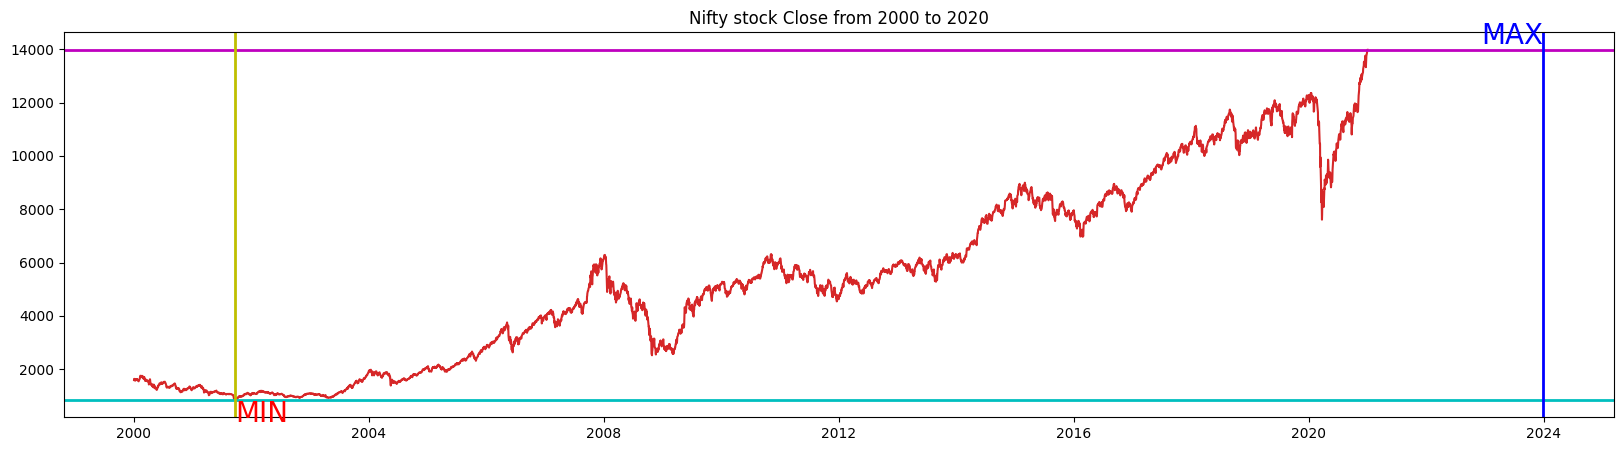

Max Value :   13981.95
Min Value :   854.2


In [34]:
plot_attribute(nifty_50_df,"Close",color='red')

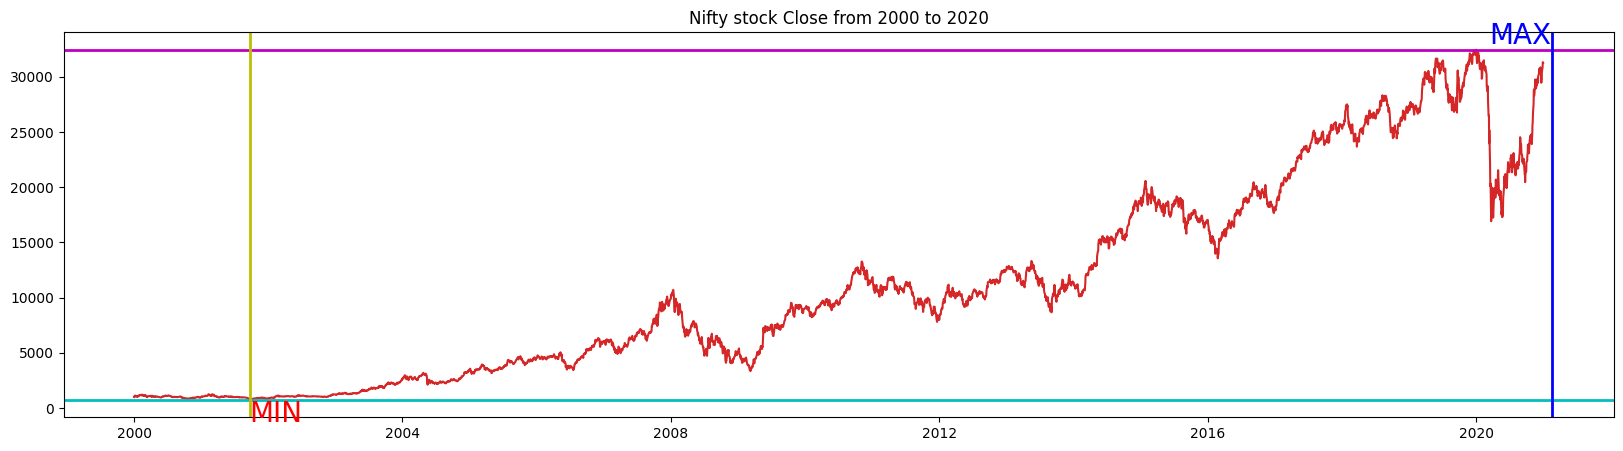

Max Value :   32443.85
Min Value :   743.7


In [35]:
plot_attribute(nifty_bank_df,"Close",color='red')

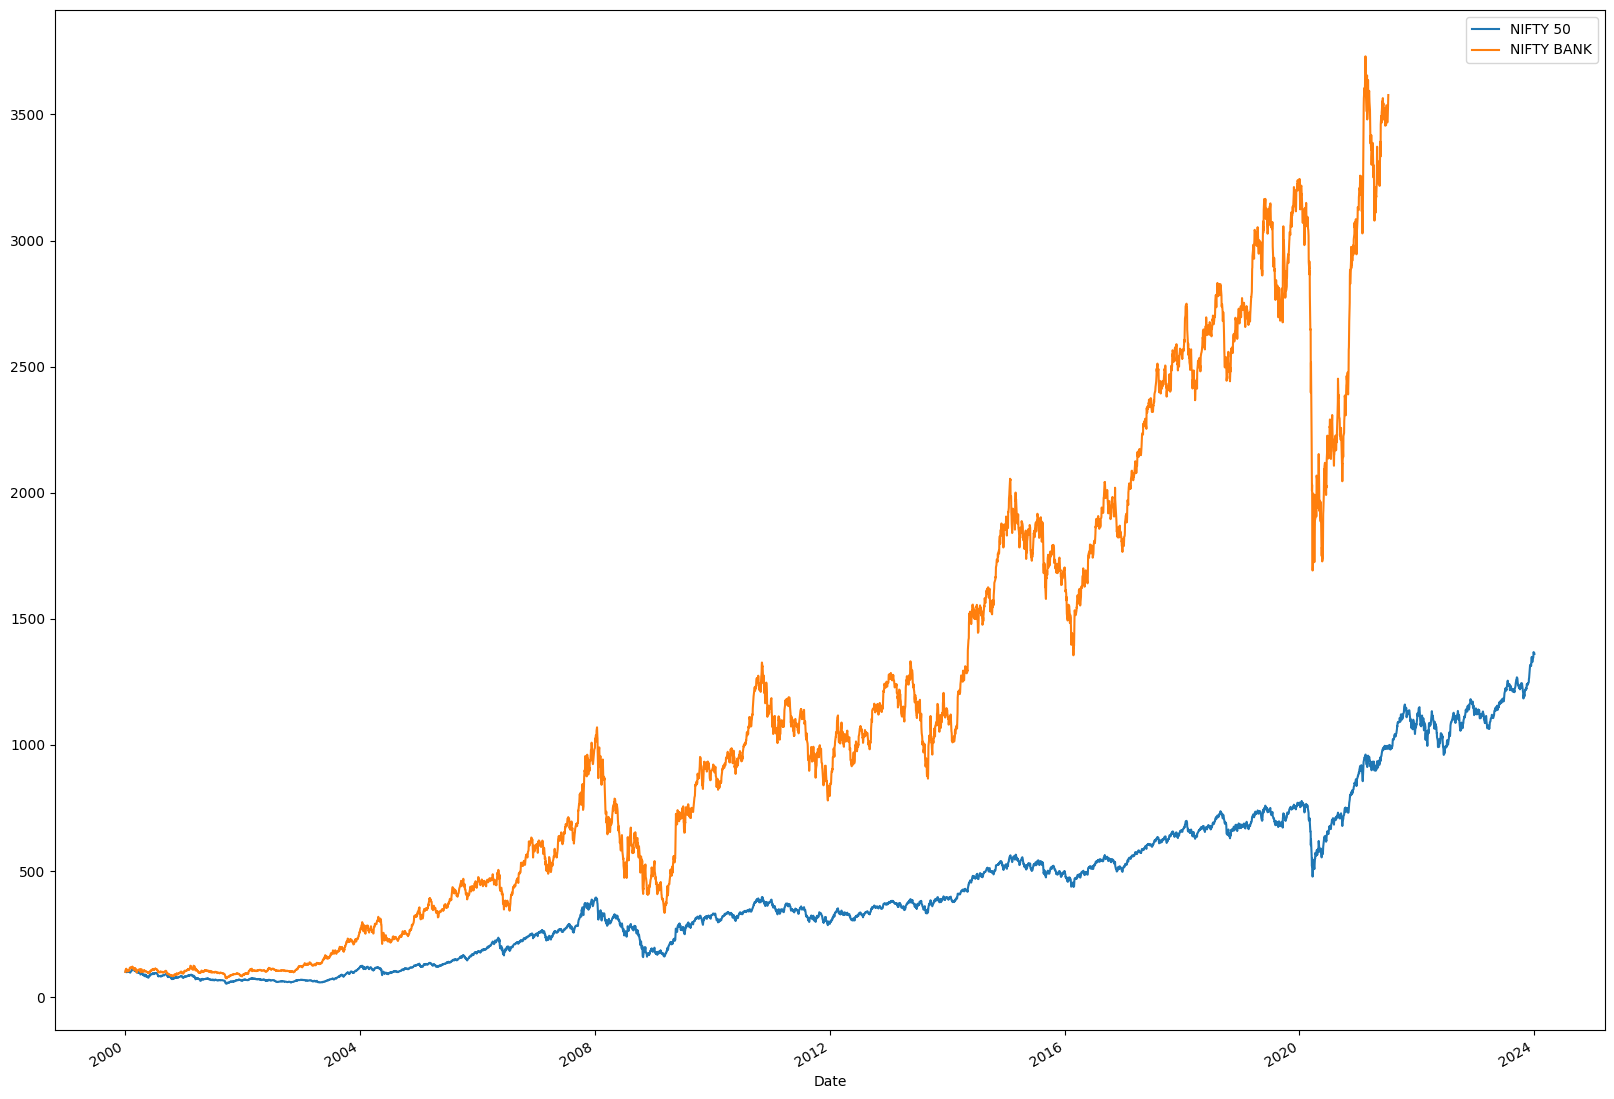

In [36]:
normalised_nifty_50_df = nifty_50_df["Close"].div(nifty_50_df["Close"].iloc[0]).mul(100)
normalised_nifty_bank_df = nifty_bank_df["Close"].div(nifty_bank_df['Close'].iloc[0]).mul(100)
normalised_nifty_50_df.plot()
normalised_nifty_bank_df.plot()
plt.legend(['NIFTY 50','NIFTY BANK'])
plt.show()

In [37]:
dicky_fuller_result = adfuller(nifty_50_df['Close'])
dicky_fuller_result

(1.8883608602990132,
 0.9985090616753913,
 34,
 5935,
 {'1%': -3.43145229664056,
  '5%': -2.8620271128107553,
  '10%': -2.56702928783387},
 70085.92822369115)

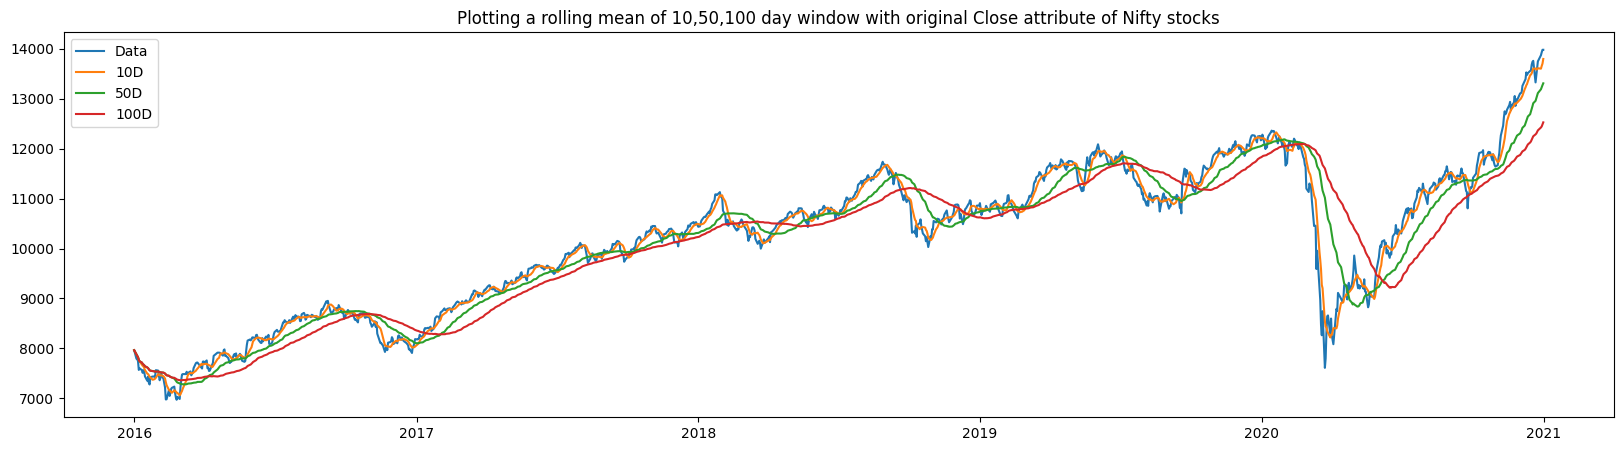

In [38]:
some_part_of_data = nifty_50_df['2016':'2020']

rolling_nifty_50_df_10 = some_part_of_data['Close'].rolling('10D').mean()
rolling_nifty_50_df_50 = some_part_of_data['Close'].rolling('50D').mean()
rolling_nifty_50_df_100 = some_part_of_data['Close'].rolling('100D').mean()

fig, ax = plt.subplots(1, figsize=(20,5))
ax.plot(some_part_of_data.index,some_part_of_data['Close'])
ax.plot(rolling_nifty_50_df_10.index, rolling_nifty_50_df_10)
ax.plot(rolling_nifty_50_df_50.index, rolling_nifty_50_df_50)
ax.plot(rolling_nifty_50_df_100.index, rolling_nifty_50_df_100)
ax.set_title("Plotting a rolling mean of 10,50,100 day window with original Close attribute of Nifty stocks")
plt.legend(['Data','10D','50D','100D'])
plt.show()

In [39]:
OHLC_data = nifty_50_df['3-2020':'2020']

fig = go.Figure(data=go.Ohlc(x=OHLC_data.index,
                            open=OHLC_data['Open'],
                            high=OHLC_data['High'],
                            low=OHLC_data['Low'],
                            close=OHLC_data['Close']))

fig.update_layout(title_text='Nifty 50 From March 2020 to May 2020',
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True,
                  xaxis_title="Time",
                  yaxis_title="Price")

fig.show()

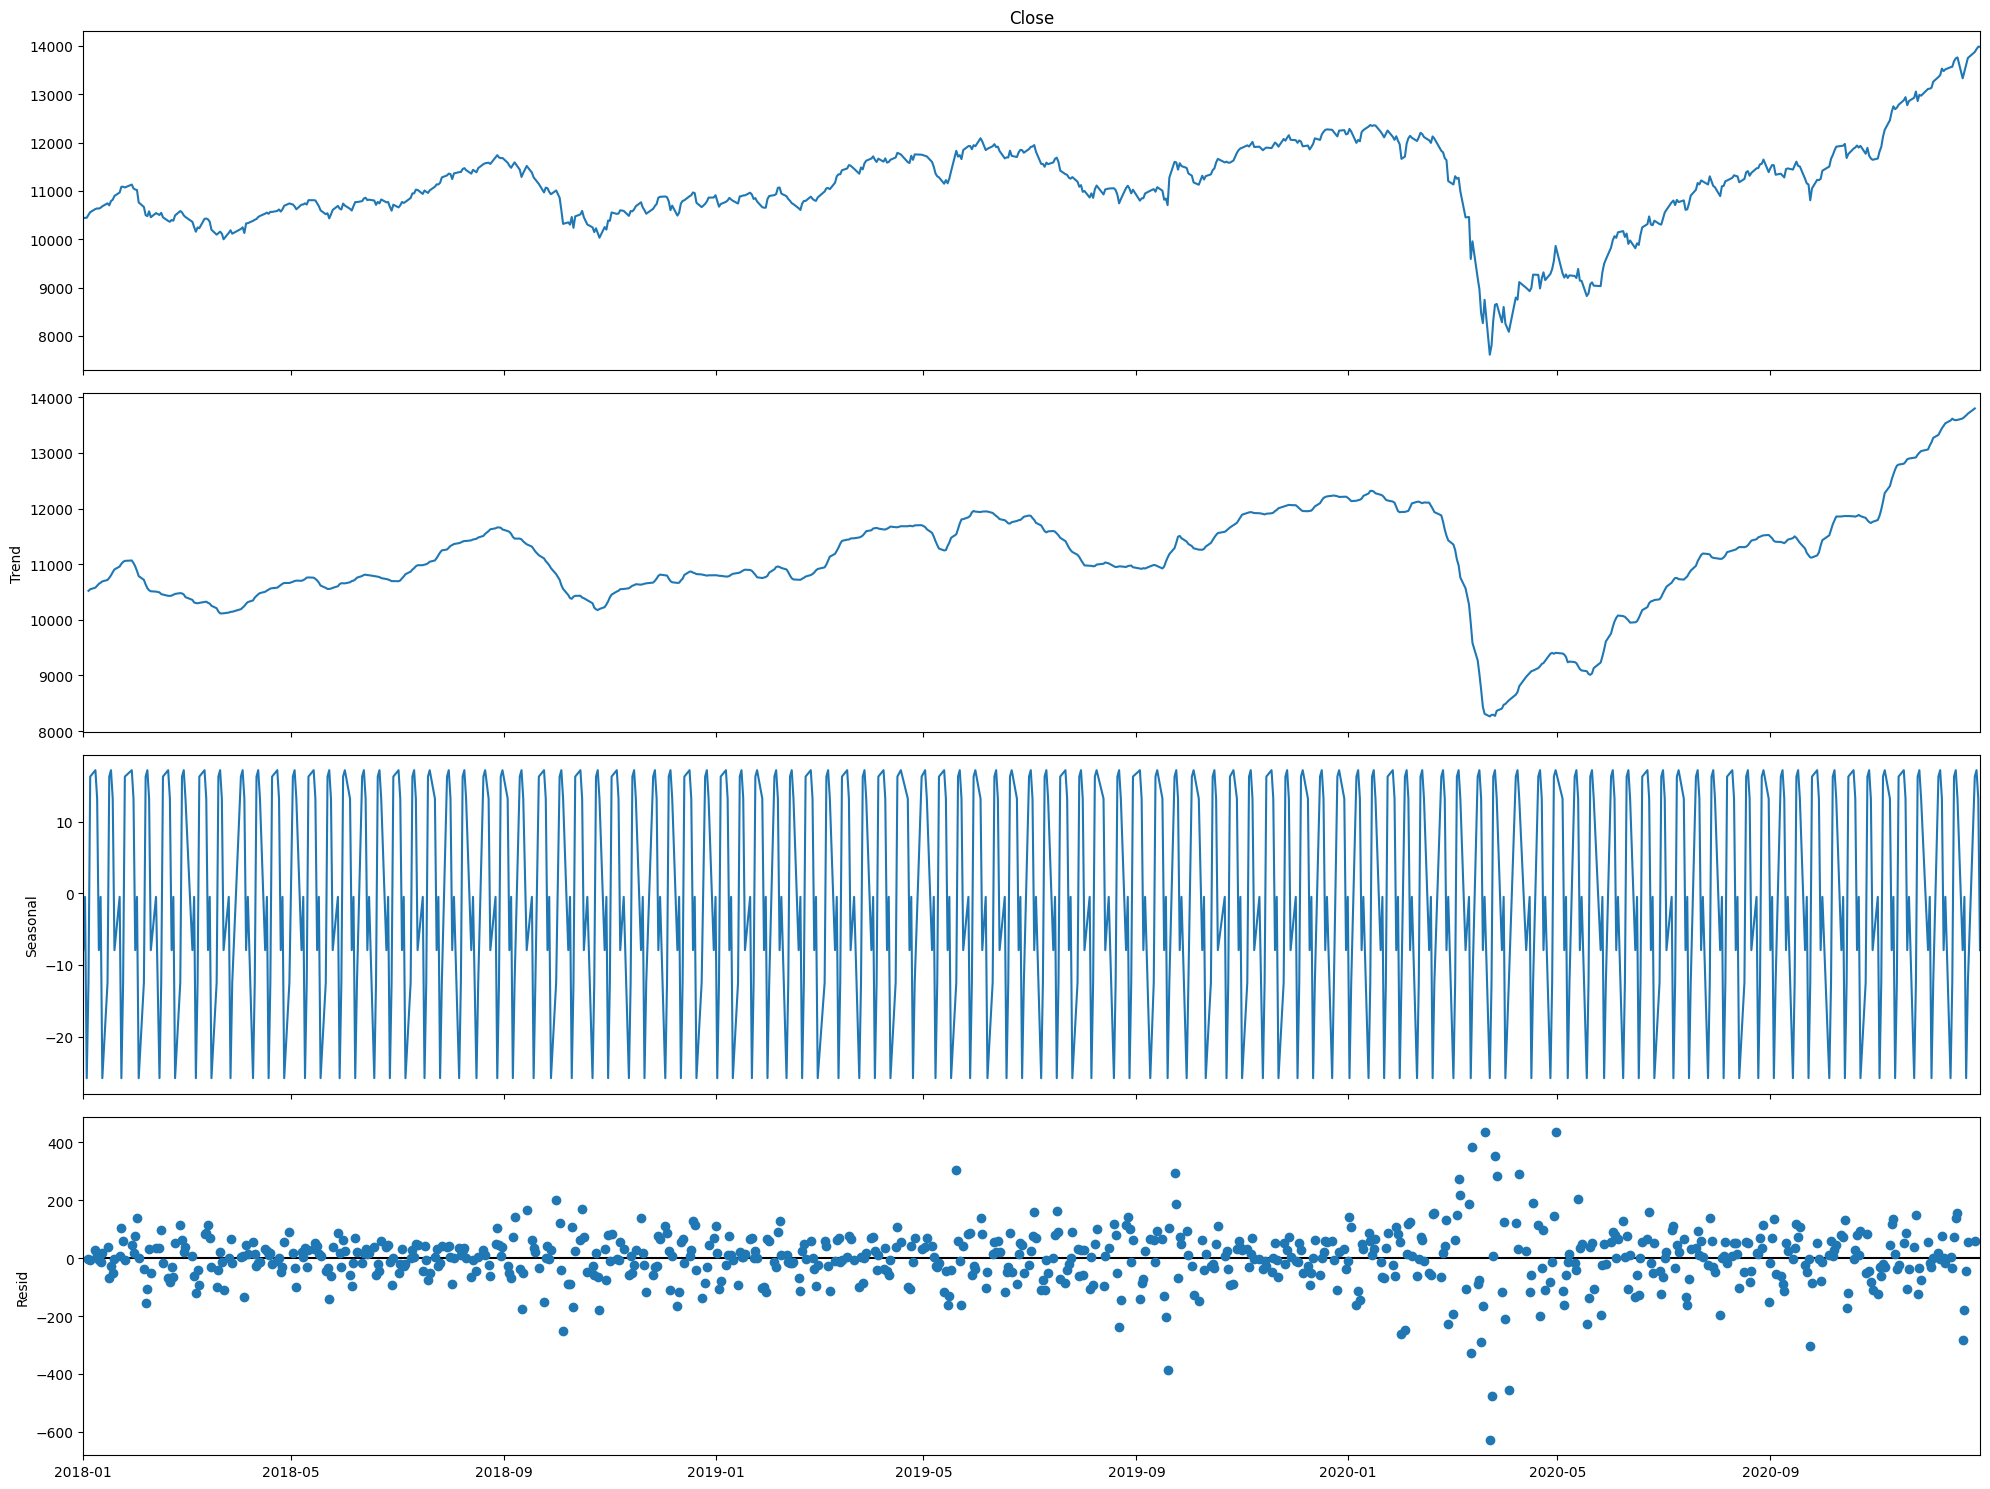

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
nifty_50_df.index = pd.to_datetime(nifty_50_df.index)
decomposition_data = nifty_50_df['2018':'2020']
period = 7  # Assuming weekly data
decomp_results = seasonal_decompose(decomposition_data['Close'], period=period)
plt.rcParams["figure.figsize"] = (20, 15)
figure = decomp_results.plot()
plt.show()

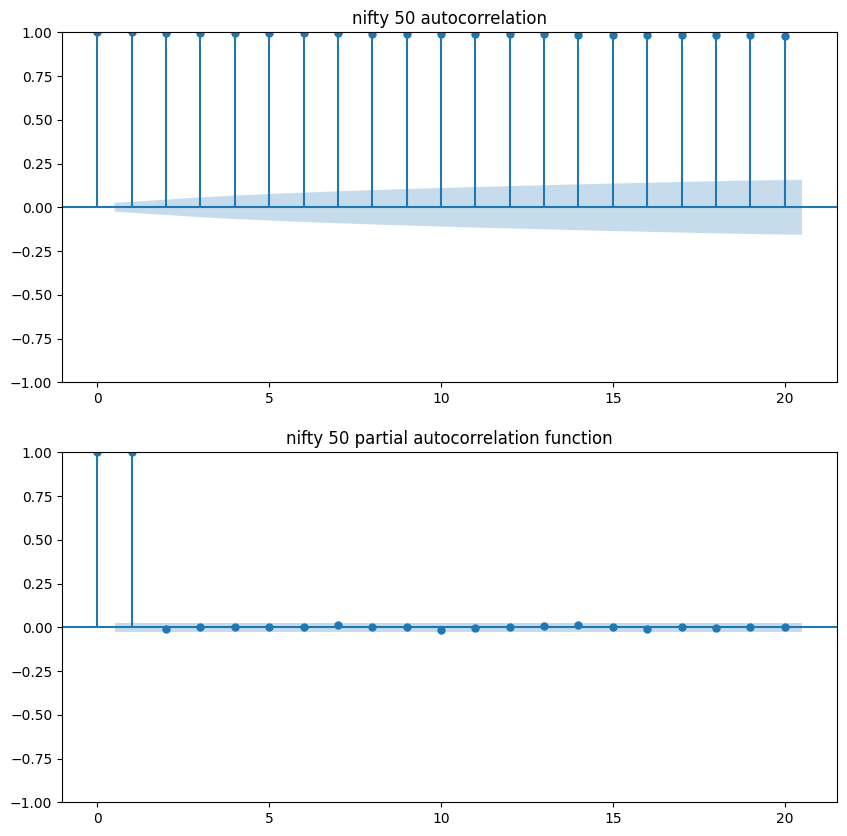

In [41]:
plt.figure(figsize=(10,10))

# ACF of Nifty 50 close price
ax1 = plt.subplot(211)
plot_acf(nifty_50_df["Close"], lags="20",title="nifty 50 autocorrelation",ax=ax1)

# PACF of Nifty 50 close price
ax2 = plt.subplot(212)
plot_pacf(nifty_50_df["Close"], lags="20",title="nifty 50 partial autocorrelation function",ax=ax2)

plt.show()

In [42]:
train_data = nifty_50_df["Close"]["2018":"4-15-2020"]
test_data =  nifty_50_df["Close"]["4-15-2020":]

In [43]:
order_aic_bic =[]
for p in range(6):
    for q in range(3):
        for d in range(2):
            model = SARIMAX(train_data, order=(p,d,q))
            results = model.fit()
            order_aic_bic.append((p,d, q, results.aic, results.bic))

In [44]:
order_df = pd.DataFrame(order_aic_bic, columns=['p','d','q', 'aic', 'bic'])
order_df.sort_values('aic')[:5]

,p,d,q,aic,bic
21,3,1,1,10.000000,31.648605
35,5,1,2,7026.688218,7061.325986
23,3,1,2,7038.550589,7064.528914
33,5,1,1,7057.305357,7087.613403
28,4,0,2,7061.407524,7091.728037


In [45]:
model = SARIMAX(train_data, order=(5,1,2))
results = model.fit()
mae = np.mean(np.abs(results.resid))
print(mae)

102.14464589527769


In [46]:
prediction = results.get_prediction(start="7-2019")
predictedmean = prediction.predicted_mean
p_bounds = prediction.conf_int()
p_lower_limit = p_bounds.iloc[:,0]
p_upper_limit = p_bounds.iloc[:,1]

In [47]:
forecast = results.get_forecast(steps=len(test_data))
mean_forecast = forecast.predicted_mean
f_bounds = forecast.conf_int()
f_lower_limit = f_bounds.iloc[:,0]
f_upper_limit = f_bounds.iloc[:,1]

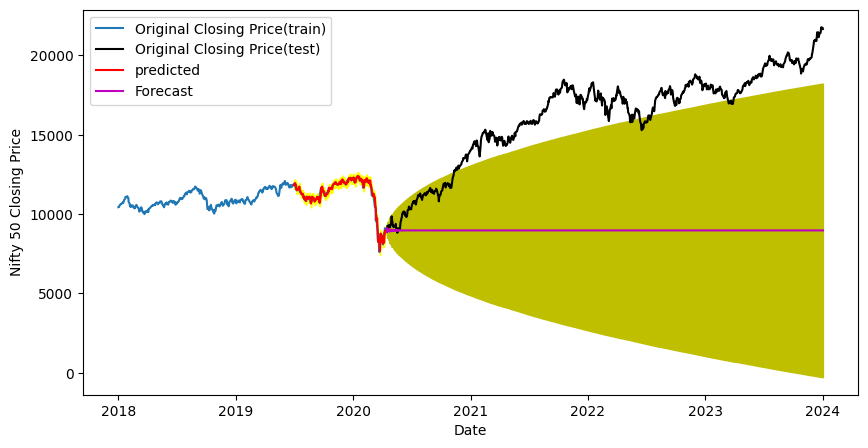

In [48]:
plt.figure(figsize=(10,5))

plt.plot(train_data.index, train_data, label='Original Closing Price(train)')
plt.plot(test_data.index, test_data, label='Original Closing Price(test)',color='k')

plt.plot(predictedmean.index, predictedmean, color='r', label='predicted')
plt.plot(test_data.index, mean_forecast, color='m', label='Forecast')

plt.fill_between(predictedmean.index,p_lower_limit,p_upper_limit, color='yellow')
plt.fill_between(test_data.index,f_lower_limit,f_upper_limit, color='y')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()

In [49]:
import keras
import keras.backend as K
K.clear_session()
from sklearn.preprocessing import MinMaxScaler

In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

X = nifty_50_df.drop(["Close", "P/E", "P/B"], axis=1)
y = nifty_50_df["Close"]

X = X.dropna()
y = y[X.index]

X = X.apply(pd.to_numeric, errors='coerce')

X = X.dropna()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

X_df = pd.DataFrame(data=X_scaled, columns=X.columns, index=X.index)
y_df = pd.DataFrame(data=y_scaled, columns=["Close"], index=y.index)

train_X_df = X_df.loc["2000":"2020-01-02"]
test_X_df = X_df.loc["2020-01-02":]

train_y_df = y_df.loc["2000":"2020-01-02"]
test_y_df = y_df.loc["2020-01-02":]

train_X = np.reshape(np.array(train_X_df), (train_X_df.shape[0], train_X_df.shape[1], 1))
test_X = np.reshape(np.array(test_X_df), (test_X_df.shape[0], test_X_df.shape[1], 1))

train_y = np.reshape(np.array(train_y_df), (train_y_df.shape[0], 1))
test_y = np.reshape(np.array(test_y_df), (test_y_df.shape[0], 1))


In [51]:
print("Train X shape : ", train_X.shape)
print("Test X shape : ", test_X.shape)

print("Train y shape : ", train_y.shape)
print("Test y shape : ", test_y.shape)

Train X shape :  (4976, 4, 1)
Test X shape :  (994, 4, 1)
Train y shape :  (4976, 1)
Test y shape :  (995, 1)


In [52]:
lstm_model = keras.models.Sequential()
lstm_model.add(keras.layers.LSTM(128,
                                 input_shape=(train_X.shape[1],1),
                                 activation='relu',
                                 return_sequences=True
                                ))

lstm_model.add(keras.layers.LSTM(64,return_sequences=False,activation='relu'))

lstm_model.add(keras.layers.Dense(32,activation='relu'))
lstm_model.add(keras.layers.Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [53]:
history = lstm_model.fit(train_X, train_y, batch_size=128,epochs=50, verbose=1, shuffle=False)

Epoch 1/50
39/39 [==============================] - 5s 37ms/step - loss: 0.0043
Epoch 2/50
39/39 [==============================] - 1s 22ms/step - loss: 0.0367
Epoch 3/50
39/39 [==============================] - 1s 21ms/step - loss: 0.0207
Epoch 4/50
39/39 [==============================] - 1s 27ms/step - loss: 0.0111
Epoch 5/50
39/39 [==============================] - 1s 21ms/step - loss: 0.0031
Epoch 6/50
39/39 [==============================] - 1s 21ms/step - loss: 9.2335e-04
Epoch 7/50
39/39 [==============================] - 1s 22ms/step - loss: 0.0021
Epoch 8/50
39/39 [==============================] - 1s 22ms/step - loss: 0.0013
Epoch 9/50
39/39 [==============================] - 1s 22ms/step - loss: 0.0048
Epoch 10/50
39/39 [==============================] - 1s 21ms/step - loss: 0.0030
Epoch 11/50
39/39 [==============================] - 1s 21ms/step - loss: 0.0013
Epoch 12/50
39/39 [==============================] - 1s 22ms/step - loss: 5.0875e-04
Epoch 13/50
39/39 [==========

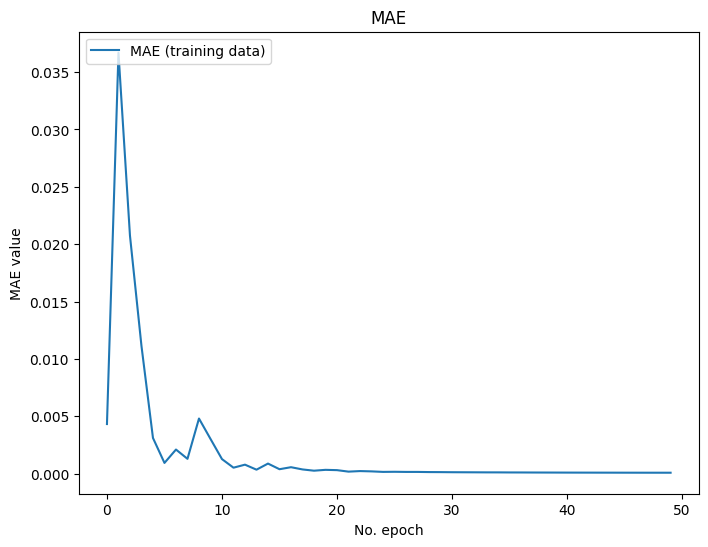

In [54]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='MAE (training data)')
plt.title('MAE')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [55]:
prediction = lstm_model.predict(test_X)

32/32 [==============================] - 0s 5ms/step


In [57]:
prediction = prediction[:test_y_df.shape[0]]
prediction = np.pad(prediction, (0, 1), 'constant')

32/32 [==============================] - 0s 8ms/step


AttributeError: 'DataFrame' object has no attribute 'prediction'

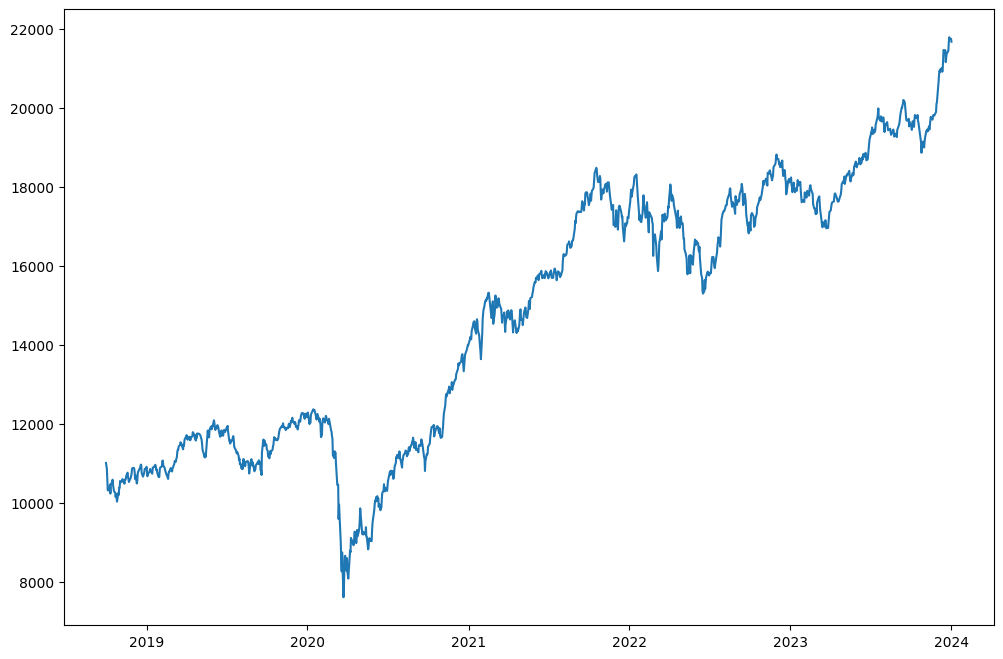

In [63]:
predicted_values = lstm_model.predict(test_X)
prediction = prediction[:test_y_df.shape[0]]
prediction = np.pad(prediction, (0, 1), 'constant')


plt.figure(figsize=(12,8))

plt.plot(nifty_50_df["10-2018":].index,nifty_50_df["10-2018":]["Close"], label="Train Price")
plt.plot(test_y_df.index,test_y_df.prediction, label="predicted Price",color='r')
plt.plot(test_y_df.index,test_y_df.Close, label="test Price",color='m')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()